In [ ]:
#connect google drive
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# ls '/content/drive/MyDrive/Downloads/Plant_leave_diseases_dataset_with_augmentation'

In [ ]:
# !unzip '/content/drive/MyDrive/Downloads/archive.zip' -d '/content/drive/MyDrive/Downloads/'

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import os
import random
import os
from os import listdir
from PIL import Image
import tensorflow as tf
from keras.preprocessing import image
from tensorflow.keras.utils import img_to_array, array_to_img
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dropout, Dense
from sklearn.model_selection import train_test_split
from keras.models import model_from_json
from keras.utils import to_categorical
from keras.models import load_model

In [ ]:
print(tf.__version__)

2.13.0


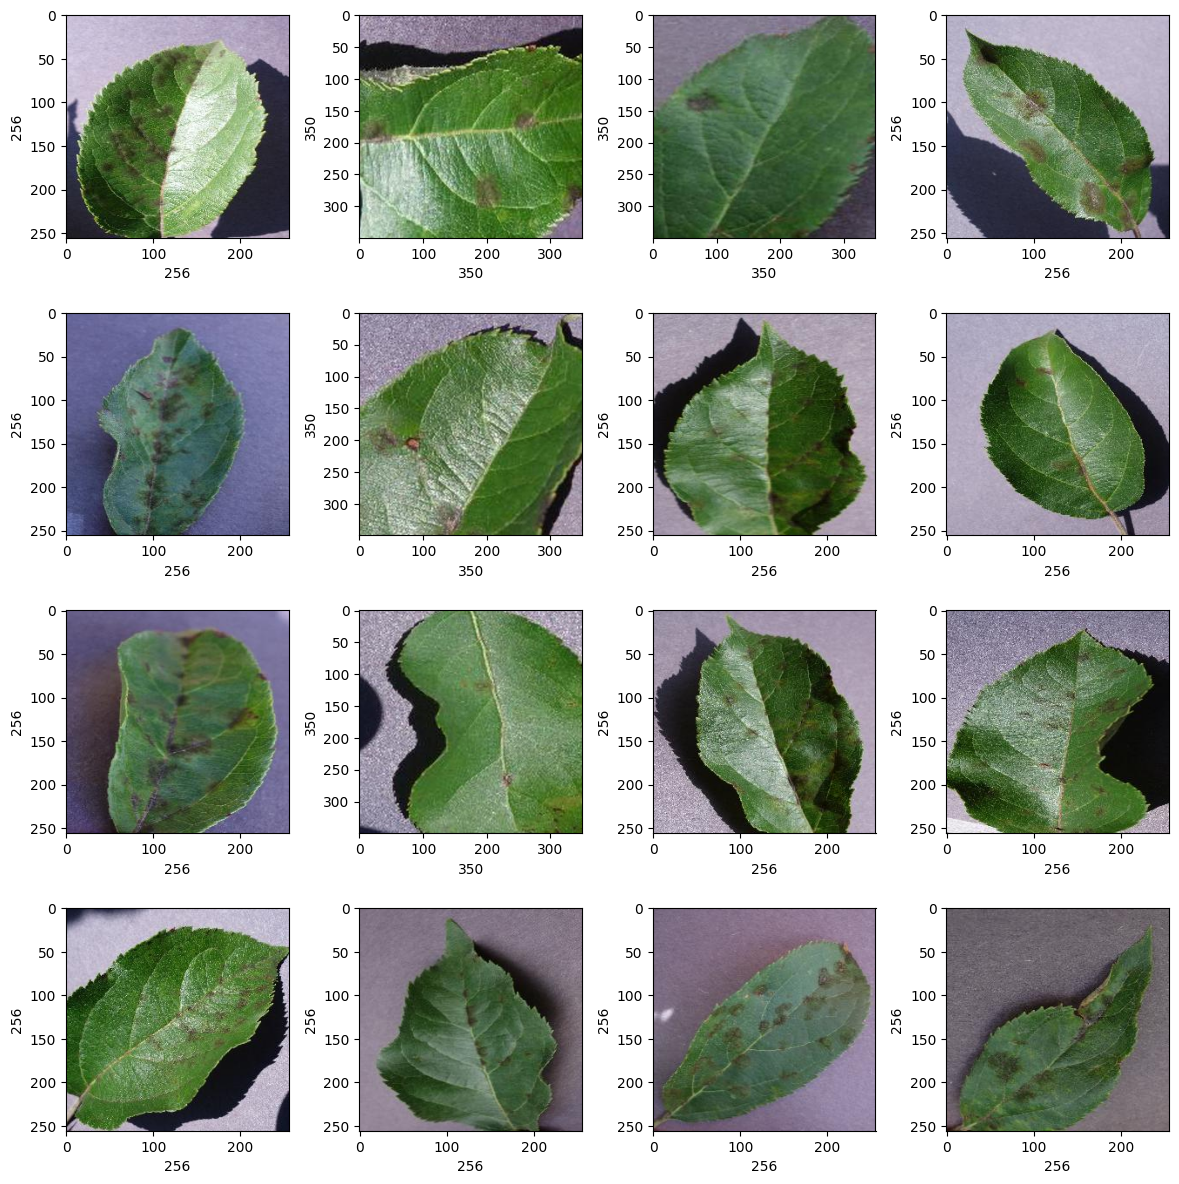

In [ ]:
#plotting 12 images to check dataset
plt.figure(figsize=(12,12))
path = '/content/drive/MyDrive/Downloads/Plant_leave_diseases_dataset_with_augmentation/Apple___Apple_scab'
for i in range(1,17):
  plt.subplot(4,4,i)
  plt.tight_layout()
  rand_img = imread(path+'/'+random.choice(sorted(os.listdir(path))))
  plt.imshow(rand_img)
  plt.xlabel(rand_img.shape[1], fontsize = 10) #width
  plt.ylabel(rand_img.shape[0], fontsize = 10) #height

In [ ]:
#images to array
def convert_image_to_array(image_dir):
  try:
    image = cv2.imread(image_dir)
    if image is not None:
      image = cv2.resize(image, (256,256))
      return img_to_array(image)
    else:
      return np.array([])
  except Exception as e:
    print(f"Error : {e}")
    return None

In [ ]:
dir = '/content/drive/MyDrive/Downloads/Plant_leave_diseases_dataset_with_augmentation'
image_list, label_list = [],[]
# all_labels = [folder for folder in os.listdir(dir) if os.path.isdir(os.path.join(dir, folder))][:3]
all_labels = ['Apple___healthy','Apple___Black_rot','Apple___Apple_scab']
print(all_labels)
binary_labels = []
for i in range(len(all_labels)):
  binary_labels.append(i)
print(binary_labels)
temp = -1

for directory in all_labels:
  plat_image_list = listdir(f"{dir}/{directory}")
  temp += 1
  for files in plat_image_list:
    image_path = f"{dir}/{directory}/{files}"
    image_list.append(convert_image_to_array(image_path))
    label_list.append(binary_labels[temp])

['Apple___healthy', 'Apple___Black_rot', 'Apple___Apple_scab']
[0, 1, 2]


In [ ]:
#Visualize the number of classes count
# label_counts = pd.DataFrame(label_list).value_counts()
# label_counts.head()

In [ ]:
image_list[0].shape

(256, 256, 3)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(image_list, label_list, test_size=0.2,random_state = 10)

In [ ]:
x_train = np.array(x_train,dtype = np.float16) / 255.0
x_test = np.array(x_test,dtype=np.float16)/255.0
x_train = x_train.reshape(-1,256,256,3)
x_test = x_test.reshape(-1,256,256,3)

In [ ]:
#one hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
#creating the model architecture, compile model and then fit it using the training data
model = Sequential()
model.add(Conv2D(32,(3,3), padding="same",input_shape=(256,256,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Conv2D(16,(3,3), padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(8,activation="relu"))
model.add(Dense(len(all_labels),activation="softmax"))
model.summary()

In [ ]:
model.compile(loss = 'categorical_crossentropy',optimizer=Adam(0.0001),metrics=['accuracy'])

In [ ]:
# splitting the training data set into training and validation data sets
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size=0.2,random_state=10)

In [ ]:
#training the model
epochs = 50
batch_size = 128
history = model.fit(x_train,y_train,batch_size=batch_size,epochs = epochs,validation_data = (x_val,y_val))

Epoch 1/50
19/19 [==============================] - 19s 317ms/step - loss: 1.0658 - accuracy: 0.4391 - val_loss: 1.0516 - val_accuracy: 0.4332
Epoch 2/50
19/19 [==============================] - 3s 134ms/step - loss: 1.0245 - accuracy: 0.4653 - val_loss: 1.0043 - val_accuracy: 0.5873
Epoch 3/50
19/19 [==============================] - 3s 148ms/step - loss: 0.9765 - accuracy: 0.5463 - val_loss: 0.9330 - val_accuracy: 0.5890
Epoch 4/50
19/19 [==============================] - 3s 175ms/step - loss: 0.8972 - accuracy: 0.5840 - val_loss: 0.8624 - val_accuracy: 0.6318
Epoch 5/50
19/19 [==============================] - 3s 133ms/step - loss: 0.8345 - accuracy: 0.6093 - val_loss: 0.8050 - val_accuracy: 0.6318
Epoch 6/50
19/19 [==============================] - 3s 151ms/step - loss: 0.7838 - accuracy: 0.6214 - val_loss: 0.7623 - val_accuracy: 0.6490
Epoch 7/50
19/19 [==============================] - 3s 152ms/step - loss: 0.7415 - accuracy: 0.6407 - val_loss: 0.7265 - val_accuracy: 0.6473
Epoch

In [ ]:
# model.save("/content/drive/MyDrive/Downloads/model-leaf-2.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# model = load_model('/content/drive/MyDrive/Downloads/model.h5')

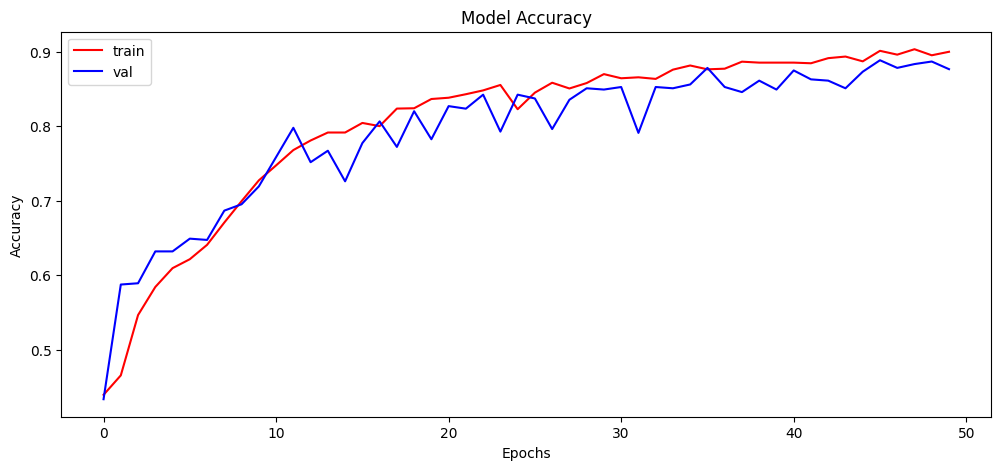

In [ ]:
#plot the training history
plt.figure(figsize=(12,5))
plt.plot(history.history['accuracy'],color='r')
plt.plot(history.history['val_accuracy'],color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train','val'])

plt.show()

In [ ]:
print('Calculating model accuracy')
scores = model.evaluate(x_test,y_test)
print(f"Test Accuract: {scores[1]*100}")

Calculating model accuracy
23/23 [==============================] - 1s 26ms/step - loss: 0.4315 - accuracy: 0.8957
Test Accuract: 89.57476019859314


In [ ]:
#making predictions on testing data
y_pred = model.predict(x_test)

23/23 [==============================] - 1s 18ms/step


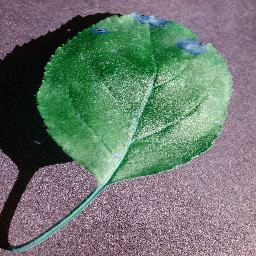

In [ ]:
#visualizing the original and predicted labels for the test images
#plotting image to compare
img = array_to_img(x_test[4])
img

In [ ]:
#finding max value from predicted list and comparing original values vs predicted
print("Original Label: ",all_labels[np.argmax(y_test[4])])
print("Predicted Label: ",all_labels[np.argmax(y_pred[4])])
print(y_pred[4])

Original Label:  Apple___Black_rot
Predicted Label:  Apple___Black_rot
[0.31101495 0.3736603  0.31532475]


In [ ]:
for i in range(50):
  print(all_labels[np.argmax(y_test[i])],"-",all_labels[np.argmax(y_pred[i])])

Apple___Black_rot - Apple___Black_rot
Apple___healthy - Apple___healthy
Apple___Black_rot - Apple___Black_rot
Apple___Apple_scab - Apple___Apple_scab
Apple___Black_rot - Apple___Black_rot
Apple___Apple_scab - Apple___Apple_scab
Apple___healthy - Apple___healthy
Apple___healthy - Apple___healthy
Apple___Apple_scab - Apple___healthy
Apple___Black_rot - Apple___Black_rot
Apple___healthy - Apple___healthy
Apple___Apple_scab - Apple___healthy
Apple___Apple_scab - Apple___Black_rot
Apple___healthy - Apple___healthy
Apple___healthy - Apple___healthy
Apple___Black_rot - Apple___Black_rot
Apple___healthy - Apple___healthy
Apple___healthy - Apple___healthy
Apple___healthy - Apple___healthy
Apple___healthy - Apple___healthy
Apple___Apple_scab - Apple___Apple_scab
Apple___Apple_scab - Apple___Apple_scab
Apple___Black_rot - Apple___healthy
Apple___healthy - Apple___healthy
Apple___healthy - Apple___healthy
Apple___healthy - Apple___healthy
Apple___Apple_scab - Apple___Apple_scab
Apple___healthy - A